# Heat Flow

[![Google Collab Book](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tum-pbs/PhiFlow/blob/develop/examples/grids/Heat_Flow.ipynb)

This example simulates heat flow through metal bars surrounded by an insulator.
The conductivity of the bars is much higher than the other material.

In [1]:
%pip --quiet install phiflow
from phi.jax.flow import *
# from phi.flow import *  # If JAX is not installed. You can use phi.torch or phi.tf as well.
from tqdm.notebook import trange

We begin by defining the domain and bar geometries. For the bars, we set the conductivity close to 1 while the rest has a conducitivity of 0.01.

<Figure size 864x360 with 3 Axes>

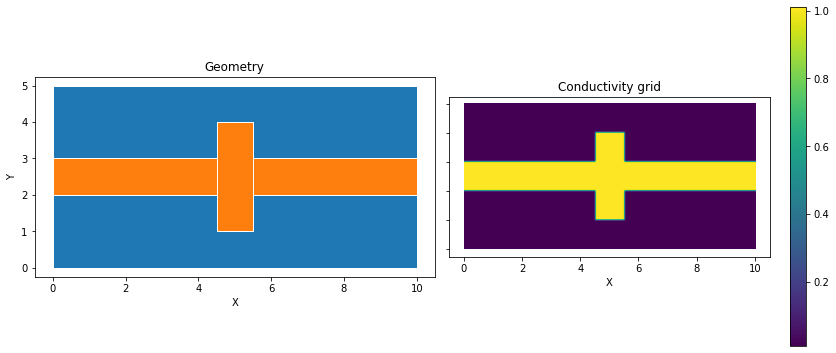

In [13]:
domain = Box(x=10, y=5)
boundary = {'x-': 1, 'x+': ZERO_GRADIENT, 'y': PERIODIC}
bars = union(Box(x=(0, 10), y=(2, 3)), Box(x=(4.5, 5.5), y=(1, 4)))
conductivity = CenteredGrid(bars, ZERO_GRADIENT, domain, x=100, y=50) + .01

plot({"Geometry": [domain, bars], "Conductivity grid": conductivity}, overlay='list')

We use implicit diffusion here. Explicit diffusion works the same way but becomes unstable for large $\Delta t$.

In [14]:
@jit_compile
def step(t, dt):
    return diffuse.implicit(t, conductivity, dt)

In [15]:
t0 = CenteredGrid(0, boundary, domain, x=100, y=50)
t_trj = iterate(step, batch(time=100), t0, dt=1, range=trange)

  0%|          | 0/100 [00:00<?, ?it/s]

In [17]:
plot(t_trj, animate='time')